In [1]:
%matplotlib inline

In [2]:
from IPython.display import Image

In [3]:
# for competibilities with Python 3
# gonna use print() function instead of print statement
# and 3 / 1 should return 3.0 in the way of Python 3 instead returning 3 with Python 2
from __future__ import print_function
from __future__ import division

[Hines Michael et al., NEURON and Python, Frontiers in Neuroinformatics(3), 28 January 2009](http://journal.frontiersin.org/article/10.3389/neuro.11.001.2009/full) 중 Fig. 3

In [4]:
Image(url="http://www.intechopen.com/source/html/39824/media/image13.jpg", width=700)

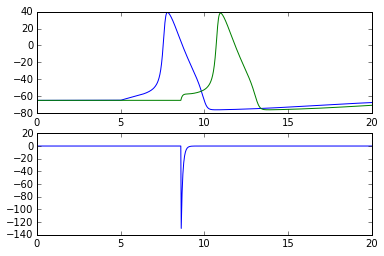

In [5]:
from neuron import h

# create pre- and post-synaptic sections
pre = h.Section()                      
post = h.Section()                      

for sec in pre, post:
    sec.insert('hh')

# inject current in the pre-synaptic section
stim = h.IClamp(0.5, sec=pre)          
stim.amp = 10.0                        
stim.delay = 5.0
stim.dur = 5.0

# create a synapse in the pre-synaptic section
syn = h.ExpSyn(0.5, sec=post)

# connect the pre-synaptic section to the
# synapse object                         
nc = h.NetCon(pre(0.5)._ref_v, syn)
nc.weight[0] = 2.0

vec = {}
for var in 'v_pre', 'v_post', 'i_syn', 't':
    vec[var] = h.Vector()

# record the membrane potentials and
# synaptic currents
vec['v_pre'].record(pre(0.5)._ref_v)
vec['v_post'].record(post(0.5)._ref_v)
vec['i_syn'].record(syn._ref_i)                   
vec['t'].record(h._ref_t)

# run the simulation
h.load_file("stdrun.hoc")              
h.init()
h.tstop = 20.0
h.run()

# plot the results
import pylab
pylab.subplot(2,1,1)
pylab.plot(vec['t'], vec['v_pre'],
           vec['t'], vec['v_post'])
pylab.subplot(2,1,2)
pylab.plot(vec['t'], vec['i_syn'])